In [1]:
import pandas as pd
import sklearn as sk
import json
import ast
import pickle
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('/data/accessible_POIs/great-britain-latest.json')

In [3]:
df

,Node,Way,Relation
99878,"{'id': 99878, 'tags': {'access': 'permissive',...",NaN,NaN
104734,"{'id': 104734, 'tags': {'name': 'Swindon', 'ne...",NaN,NaN
106213,"{'id': 106213, 'tags': {'crossing': 'unmarked'...",NaN,NaN
108042,"{'id': 108042, 'tags': {'addr:housenumber': '3...",NaN,NaN
251191,"{'id': 251191, 'tags': {'name': 'Gibbet Hill',...",NaN,NaN
...,...,...,...
8495396114,"{'id': 8495396114, 'tags': {'access': 'yes', '...",NaN,NaN
8495396115,"{'id': 8495396115, 'tags': {'access': 'yes', '...",NaN,NaN
8497470120,"{'id': 8497470120, 'tags': {'access': 'private...",NaN,NaN
8497671325,"{'id': 8497671325, 'tags': {'barrier': 'gate',...",NaN,NaN


In [4]:
df.loc[:,'id'] = df['Node'].apply(lambda x: dict(x)['id'])
df.loc[:,'wheelchair'] = df['Node'].apply(lambda x: dict(x)['tags'].get('wheelchair'))
df.loc[:,'amenity'] = df['Node'].apply(lambda x: dict(x)['tags'].get('amenity'))
df.loc[:,'cuisine'] = df['Node'].apply(lambda x: dict(x)['tags'].get('cuisine'))
df.loc[:,'addr:city'] = df['Node'].apply(lambda x: dict(x)['tags'].get('addr:city'))
df.loc[:,'name'] = df['Node'].apply(lambda x: dict(x)['tags'].get('name'))
df.loc[:,'lon'] = df['Node'].apply(lambda x: dict(x)['lonlat'][0])
df.loc[:,'lat'] = df['Node'].apply(lambda x: dict(x)['lonlat'][1])
df.drop(['Node','Way','Relation'], axis=1, inplace=True)
df=df.loc[df['amenity'] == 'restaurant']
df.drop(['amenity'], axis=1, inplace=True)
df

/shared/cm_feat/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,id,wheelchair,cuisine,addr:city,name,lon,lat
4082701,4082701,yes,None,Clapham,Bellini's,-0.492195,52.160205
6721878,6721878,yes,pizza,Bedford,Pizza Hut,-0.444455,52.133114
18351898,18351898,yes,indian,Cambridge,Tamarind,0.190265,52.203193
20940247,20940247,no,asian,Cambridge,Gourmet House,0.113019,52.212130
22533343,22533343,limited,international,None,Yarrow Bridge,-2.617820,53.639840
...,...,...,...,...,...,...,...
8026542696,8026542696,yes,pakistani;curry,London,Lahore Karahi,-0.166189,51.429596
8156347040,8156347040,yes,thai,None,Made In Thai,-2.131521,52.585324
8262209917,8262209917,yes,chicken,Glasgow,Chilli Cottage,-4.296294,55.851781
8262209918,8262209918,yes,lebanese,Glasgow,Beirut Star,-4.298721,55.851492


# Simplify Cuisine features

<AxesSubplot:>

/shared/cm_feat/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/shared/cm_feat/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3619 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/shared/cm_feat/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3633 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/shared/cm_feat/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3623 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/shared/cm_feat/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/shared/cm_feat/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 3594 missing from c

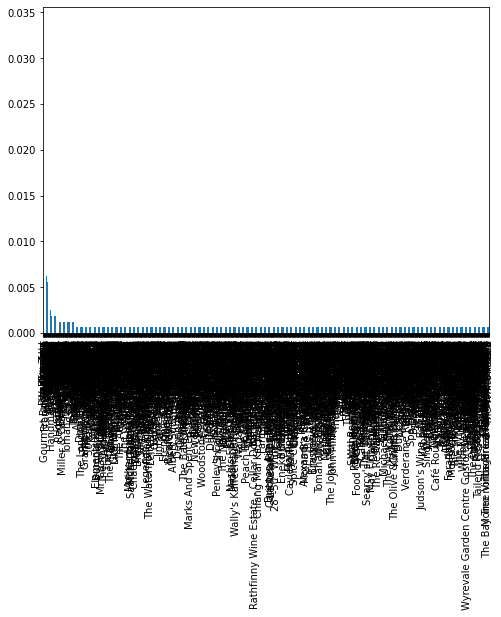

In [5]:
fig,ax = plt.subplots(figsize=(8,6))
df['name'].value_counts(normalize=True).plot(kind='bar')

In [6]:
df['cuisine_cat'] = df['cuisine'].replace(['Thai and Malaysian','sushi','Asian Fusion','chinese','thai','asian','japanese','indian','vietnamese','oriental','pakistani;curry','thai','and','Malaysian','japanese;teppanyaki;steak','asian;thai;malaysian','indian;thai','chinese;japanese','indian;south_indian','Asian','Fusion','cantonese','dimsum','curry;indian','nepalese;indian','nepalese','nepali','korean','noodle','thailandese','malaysian','bangladeshi','south_indian','curry'], 'asian')
df['cuisine_cat'] = df['cuisine_cat'].replace(['italian','pizza','italian;pizza','italian;asian','italian;ice_cream;italian_pizza'], 'italian_general')
df['cuisine_cat'] = df['cuisine_cat'].replace(['belgian','brazilian','steak','seafood;steak_house','steak_house;burger;sandwich;chicken;seafood','persian','latin_american','scottish;european','caribbean','portuguese','argentinian','american','fish;fish_and_chips','french','modern_british','spanish','german','european','english','finedining','international;european;british;modern','fish_and_chips','british','steak_house','international','tapas','peruvian','swedish'], 'European_American_Food')
df['cuisine_cat'] = df['cuisine_cat'].replace(['chicken;portuguese','burger','chicken','grill;pasta;pizza','barbecue','bar&grill','burger;sandwich;indian;asian;chicken;ice_cream','burger,_steak,_ribs','burger;sandwich','burger;lobster','meat;wine','burger;chicken;kebab;pizza','burger;chicken;international;seafood;fish_and_chips','fish;seafood','pizza;barbecue','breakfast;soup;pizza;pasta','pancake','bakery','regional;burger'], 'Burger_Chicken_Grill')
df['cuisine_cat'] = df['cuisine_cat'].replace(['moroccan','mexican','mediterranean','greek','turkish','lebanese','tex-mex','kebab','turkish;mediterranean','middle_eastern;international','greek;mediterranean','mediterranean;turkish','turkish_meze','middle_eastern','afghan','arab','sudanese','african'], 'Turkey_and_Mideast')
df['cuisine_cat'] = df['cuisine_cat'].replace(['coffee_shop','breakfast','seafood;ice_cream','ice_cream','international;ice_cream','coffee_shop;thai','coffee_shop;international','dessert;ice_cream'], 'Coffee_and_desert')
df['cuisine_cat'] = df['cuisine_cat'].replace(['regional,_fine_dining','fine dining','seafood','Coffee_and_desert','fish','regional,fine_dining','sandwich','varied','organic','Student','macaroons','pub','Tapas_and_Cocktails','soup'], 'others')

<ipython-input-6-14ee4c95a50f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cuisine_cat'] = df['cuisine'].replace(['Thai and Malaysian','sushi','Asian Fusion','chinese','thai','asian','japanese','indian','vietnamese','oriental','pakistani;curry','thai','and','Malaysian','japanese;teppanyaki;steak','asian;thai;malaysian','indian;thai','chinese;japanese','indian;south_indian','Asian','Fusion','cantonese','dimsum','curry;indian','nepalese;indian','nepalese','nepali','korean','noodle','thailandese','malaysian','bangladeshi','south_indian','curry'], 'asian')
<ipython-input-6-14ee4c95a50f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

<AxesSubplot:>

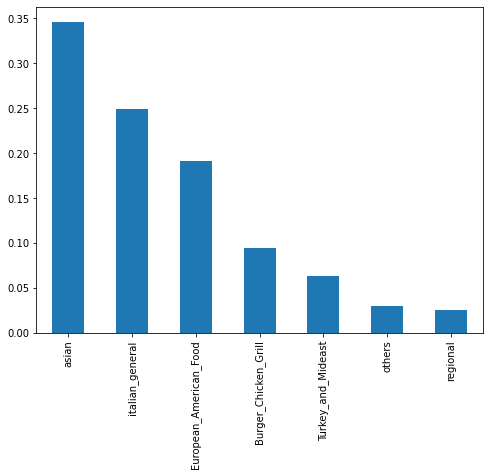

In [7]:
fig,ax = plt.subplots(figsize=(8,6))
df['cuisine_cat'].value_counts(normalize=True).plot(kind='bar')

## Normalized Cuisine features

In [8]:
df["cuisine_cat"].value_counts()
nameofcuisine=list(df["cuisine_cat"].value_counts().index)
numofcuisine=df["cuisine_cat"].value_counts().to_numpy()
df['normalized_cuisine_cat'] = df['cuisine_cat'].replace(nameofcuisine,numofcuisine/len(df["name"]))

<ipython-input-8-9d04b9855370>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_cuisine_cat'] = df['cuisine_cat'].replace(nameofcuisine,numofcuisine/len(df["name"]))


## Normalized name features

In [9]:
df["name"].value_counts()

PizzaExpress                          55
Nando's                               47
Wagamama                              31
Zizzi                                 21
Pizza Hut                             19
                                      ..
Momo north-African & Mediterranean     1
Rosa's                                 1
Galleries Cafe                         1
202                                    1
The White House                        1
Name: name, Length: 1237, dtype: int64

In [10]:
nameofResturant=list(df["name"].value_counts().index)
numofResturant=df["name"].value_counts().to_numpy()
df['normalized_numofResturant'] = df['name'].replace(nameofResturant,numofResturant/len(df["name"]))

<ipython-input-10-4639657f8eed>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_numofResturant'] = df['name'].replace(nameofResturant,numofResturant/len(df["name"]))


## Normalized city features

<AxesSubplot:>

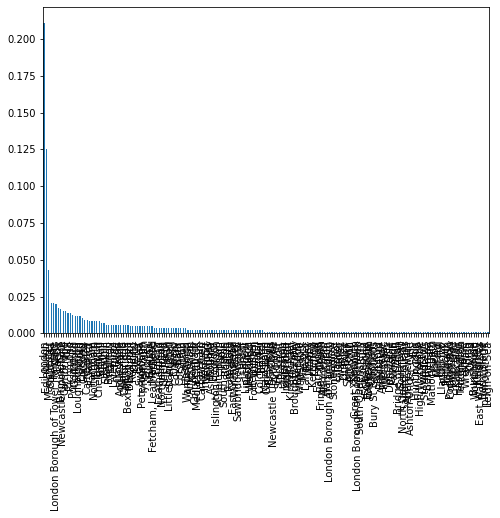

In [11]:
fig,ax = plt.subplots(figsize=(8,6))
df['addr:city'].value_counts(normalize=True).plot(kind='bar')

In [12]:
df["addr:city"].value_counts()

London              182
Edinburgh           108
Manchester           37
Southsea             18
Reigate              18
                   ... 
Keighley              1
East Wall houses      1
Burntisland           1
plymouth UK           1
Leigh-on-Sea          1
Name: addr:city, Length: 186, dtype: int64

In [13]:
nameofcity=list(df["addr:city"].value_counts().index)
numofcity=df["addr:city"].value_counts().to_numpy()
df['normalized_numofcity'] = df['addr:city'].replace(nameofcity,numofcity/len(df["name"]))

<ipython-input-13-47b3ced2f713>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized_numofcity'] = df['addr:city'].replace(nameofcity,numofcity/len(df["name"]))


In [15]:
df.drop(['cuisine'], axis=1, inplace=True)
df.drop(['addr:city'], axis=1, inplace=True)
df.drop(['name'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)
df.drop(['cuisine_cat'], axis=1, inplace=True)

KeyError: "['cuisine'] not found in axis"

In [16]:
df

,wheelchair,lon,lat,normalized_cuisine_cat,normalized_numofResturant,normalized_numofcity
4082701,yes,-0.492195,52.160205,NaN,0.000613,0.000613
6721878,yes,-0.444455,52.133114,0.170343,0.011642,0.001225
18351898,yes,0.190265,52.203193,0.236520,0.000613,0.007966
20940247,no,0.113019,52.212130,0.236520,0.000613,0.007966
22533343,limited,-2.617820,53.639840,0.131127,0.000613,NaN
...,...,...,...,...,...,...
8026542696,yes,-0.166189,51.429596,0.236520,0.000613,0.111520
8156347040,yes,-2.131521,52.585324,0.236520,0.000613,NaN
8262209917,yes,-4.296294,55.851781,0.064951,0.000613,0.004902
8262209918,yes,-4.298721,55.851492,0.043505,0.000613,0.004902


In [ ]:
#df.to_pickle('/shared/restaurants_accessible_cleaned.pkl')

In [17]:
acc_df = pd.read_pickle('/shared/numberOfNearbyPOIs.pkl')

In [18]:
allacc_df= pd.read_pickle('/shared/accessible_pois.pkl')

In [19]:
allacc_df.loc[:,'numOfaccessiblePoiNearby_100m'] = acc_df['numOfaccessiblePoiNearby_100m']
allacc_df.loc[:,'numOfaccessiblePoiNearby_1000m'] = acc_df['numOfaccessiblePoiNearby_1000m']
allacc_df_restaurantonly=allacc_df.loc[allacc_df['amenity'] == 'restaurant']
df.loc[:,'numOfaccessiblePoiNearby_100m'] = allacc_df_restaurantonly['numOfaccessiblePoiNearby_100m']
df.loc[:,'numOfaccessiblePoiNearby_1000m'] = allacc_df_restaurantonly['numOfaccessiblePoiNearby_1000m']

/shared/cm_feat/lib/python3.8/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/shared/cm_feat/lib/python3.8/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [20]:
import numpy as np
df = df.replace(np.nan, 0)

In [21]:
df

,wheelchair,lon,lat,normalized_cuisine_cat,normalized_numofResturant,normalized_numofcity,numOfaccessiblePoiNearby_100m,numOfaccessiblePoiNearby_1000m
4082701,yes,-0.492195,52.160205,0.000000,0.000613,0.000613,1.0,3.0
6721878,yes,-0.444455,52.133114,0.170343,0.011642,0.001225,1.0,3.0
18351898,yes,0.190265,52.203193,0.236520,0.000613,0.007966,2.0,2.0
20940247,no,0.113019,52.212130,0.236520,0.000613,0.007966,1.0,55.0
22533343,limited,-2.617820,53.639840,0.131127,0.000613,0.000000,0.0,2.0
...,...,...,...,...,...,...,...,...
8026542696,yes,-0.166189,51.429596,0.236520,0.000613,0.111520,1.0,6.0
8156347040,yes,-2.131521,52.585324,0.236520,0.000613,0.000000,1.0,14.0
8262209917,yes,-4.296294,55.851781,0.064951,0.000613,0.004902,1.0,7.0
8262209918,yes,-4.298721,55.851492,0.043505,0.000613,0.004902,1.0,2.0


In [ ]:
#df.to_pickle('/shared/restaurants_accessible_cleaned_updated.pkl')